In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("12-house_energy_regression.csv")
print(df.columns)
print(df.shape)
print(df.info())
print(df.isnull().sum())
display(df.head())

Index(['avg_indoor_temp_change', 'outdoor_humidity_level',
       'daily_energy_consumption_kwh'],
      dtype='object')
(1000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB
None
avg_indoor_temp_change          0
outdoor_humidity_level          0
daily_energy_consumption_kwh    0
dtype: int64


,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


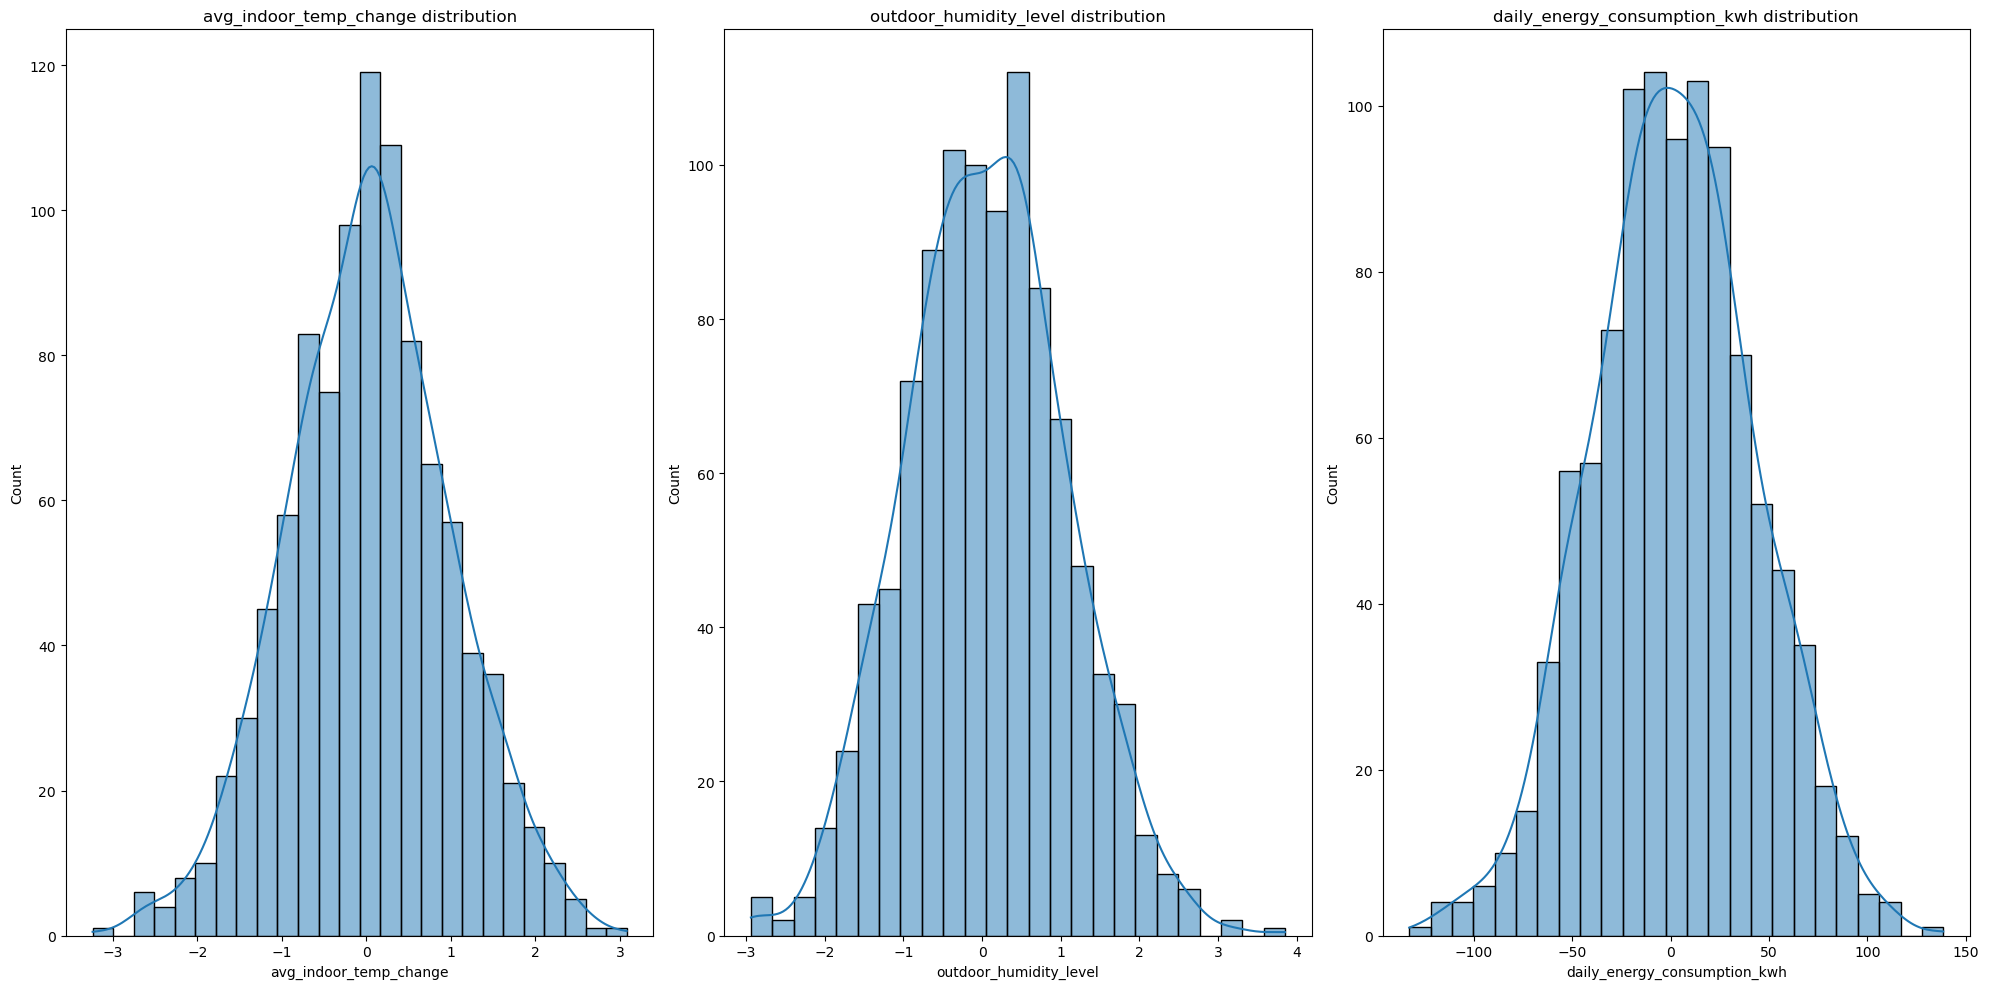

In [3]:
columns = df.columns
fig, ax = plt.subplots(1,3,figsize=(20,10))
ax = ax.flatten()

for i, col in enumerate(columns):
    sns.histplot(
        x=col,
        data=df,
        kde=True,
        ax=ax[i]
    )
    ax[i].set_title(f"{col} distribution")

plt.tight_layout()
plt.show()

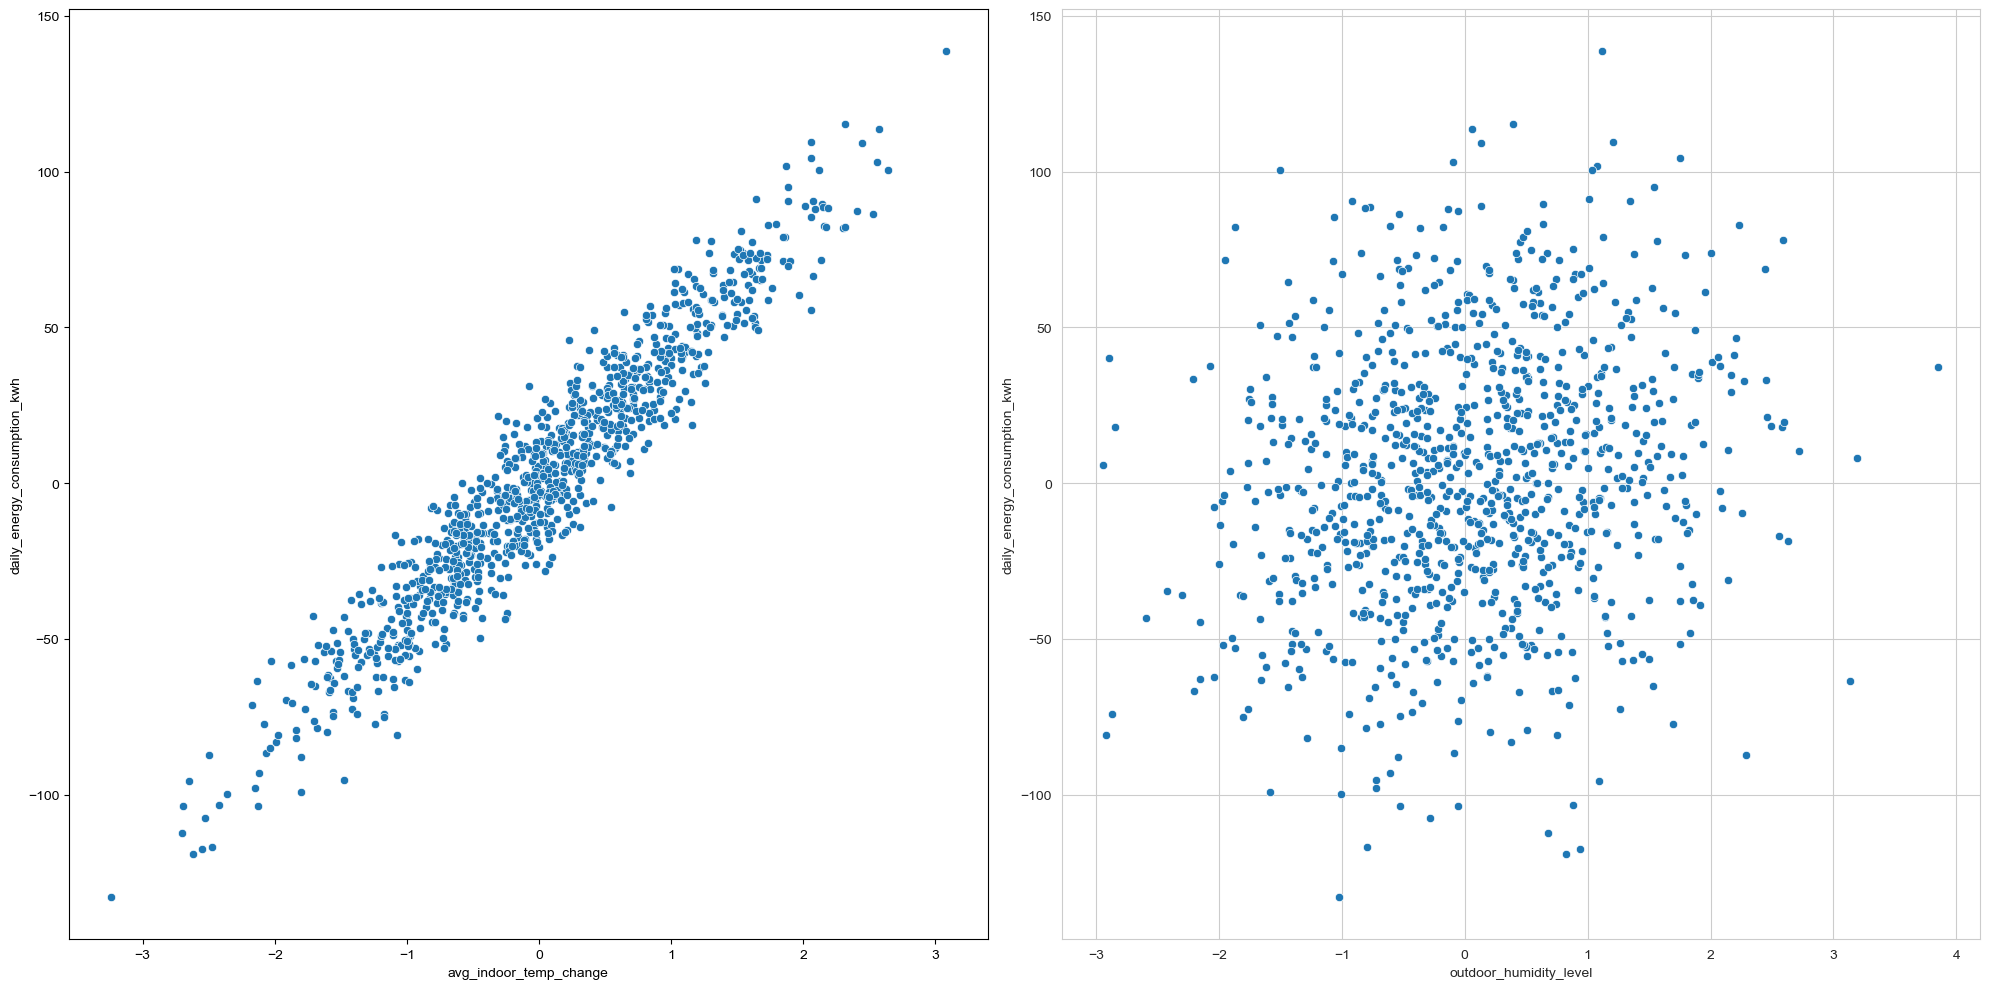

In [4]:
columns1 = ["avg_indoor_temp_change", "outdoor_humidity_level"]
plt.figure(figsize=(20,10))
for i, col in enumerate(columns1):
    plt.subplot(1,2,i+1)
    sns.set_style("whitegrid")
    sns.scatterplot(x=col, y="daily_energy_consumption_kwh", data=df)
    plt.xlabel(col)
    plt.ylabel("daily_energy_consumption_kwh")

plt.tight_layout()
plt.show()

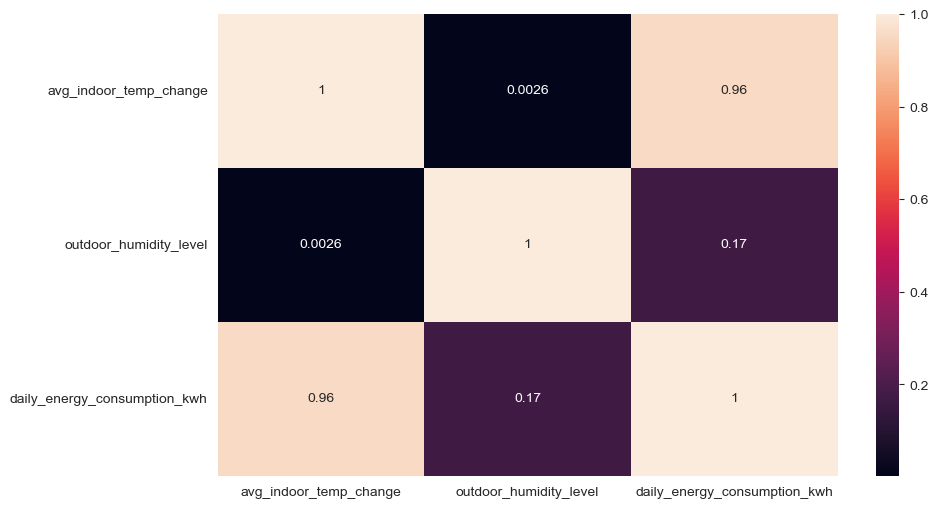

In [5]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.show()

In [6]:
# Dağılımları, ilişkileri ve korelasyonları inceledik ve data hakkında bir fikir edindik.
# Şimdi yavaş yavaş model kurma aşamasına geçebiliriz.

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop("daily_energy_consumption_kwh", axis=1)
y = df["daily_energy_consumption_kwh"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Score:  0.9152685146562609
MSE:  140.40201685069158
MAE:  9.42143518926242


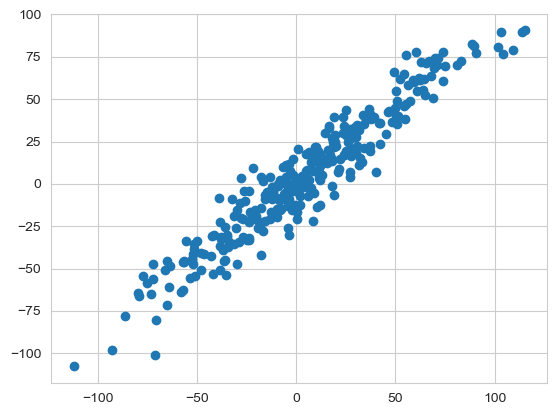

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
regressor = KNeighborsRegressor(n_neighbors=5, algorithm="auto")
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)
print("Score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [10]:
# Modelimiz default parametrelerde eğitildi ve gayet iyi sonuçlar verdi.
# Özellikle n_neighbors parametresini değiştirerek modelin vereceği sonuçları tekrar inceleyebiliriz.

Score:  0.9045615102810763
MSE:  158.14376895861895
MAE:  10.13561216271314


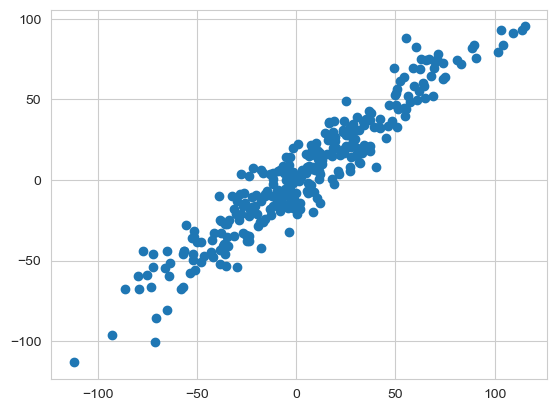

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
regressor = KNeighborsRegressor(n_neighbors=3, algorithm="auto")
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)
print("Score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [12]:
# n_neighbors parametresini 3 yaptığımız zaman R2 skorunda küçücük bir değişim yaşandı.
# Diğer değerler için de sonuçları inceleyebiliriz.